# Import 

In [97]:
import pandas as pd
from pathlib import Path
import numpy as np
import plotly.express as px
from plotly.graph_objs import Figure
from importlib import reload
import software.analysis as a
reload(a)

<module 'software.analysis' from '/Users/alexpayne/Scientific_Projects/asapdiscovery-sars-retrospective/software/analysis.py'>

# Load CSVs

In [2]:
active_site_torsions = pd.read_csv("/Users/alexpayne/Scientific_Projects/mers-drug-discovery/sars2-retrospective-analysis/torsion_actst.csv")

In [5]:
active_site_torsions.Torsion_0[0]

'[-0.21488283574581146, -0.7021403908729553, -0.9453724026679993, 0.41017937660217285, -2.5573437213897705, -2.594928503036499, -0.6006665229797363, -3.138399600982666, -3.1410694122314453, -2.3693289756774902, -1.2101986408233643, -0.4871918261051178, -1.2067476511001587, 2.2615983486175537, -3.105968952178955, -3.1409122943878174, -3.140967845916748, 3.1380319595336914, -0.8218186497688293, -1.0727018117904663, -0.36876994371414185, -0.5118576884269714, -0.7081678509712219, 1.3122137784957886, -1.912137746810913, -3.0031964778900146, -2.8186755180358887, 0.04907023534178734, 3.1144487857818604, -0.06571930646896362, 1.007720708847046, 1.0401407480239868, -1.0147669315338135, -0.531128466129303, -1.105394721031189, -2.5957882404327393, -1.3426345586776733, 2.880308151245117, -0.7133517265319824, 2.1653552055358887, -0.8408876061439514, -0.8431228399276733, -0.5974004864692688, -1.0537173748016357, -2.286526679992676, -1.1622872352600098, 0.11255794763565063, 0.11758086830377579, -0.40

In [6]:
active_site_sasa = pd.read_csv("/Users/alexpayne/Scientific_Projects/mers-drug-discovery/sars2-retrospective-analysis/summation_matrix(1).csv")

In [18]:
active_site_sasa.iloc[4,0]

'/Users/kendalllemons/Downloads/asap-datasets/full_frag_prepped_mpro_20230603/prepped_structures/splits/refined/Mpro-P2201_0B_PET-UNK-d899bab6-1-prepped_protein_active_site.pdb'

In [31]:
active_site_sasa.iloc[0, :]

Complex_File    /Users/kendalllemons/Downloads/asap-datasets/f...
Summation                                              147.578023
Name: 0, dtype: object

In [20]:
full_sasa = pd.read_csv("/Users/alexpayne/Scientific_Projects/mers-drug-discovery/sars2-retrospective-analysis/sasa_data.csv")

In [24]:
full_sasa.sum(numeric_only=True, axis=1)

0      147.578023
1      145.006389
2      144.659330
3       29.294029
4       29.752665
          ...    
431    147.916719
432    148.704412
433    146.508971
434     29.984808
435     29.359516
Length: 436, dtype: float64

In [74]:
sasa_v2 = pd.read_csv("/Users/alexpayne/Scientific_Projects/mers-drug-discovery/sars2-retrospective-analysis/summation_matrix(2).csv")
sasa_v2["Structure_Source"] = sasa_v2.Complex_File.apply(lambda x: Path(x).name.split("-prepped")[0].split("_0")[0])
sasa_v2_edited = sasa_v2.drop(columns=["Complex_File"])
sasa_v2_edited.columns = ["SASA (nm^2)", "Structure_Name"]
sasa_v2_edited

,SASA (nm^2),Structure_Name
0,29.294029,Mpro-P0906
1,29.752665,Mpro-P2201
2,29.491965,Mpro-P0154
3,29.440856,Mpro-P0157
4,30.117635,Mpro-P0053
...,...,...
213,29.421417,Mpro-P0661
214,29.921860,Mpro-P2724
215,29.428685,Mpro-P0800
216,29.984808,Mpro-P1980


## load docking results

In [75]:
df = pd.read_csv("/Users/alexpayne/Scientific_Projects/mers-drug-discovery/sars2-retrospective-analysis/20230611-combined.csv", index_col=0)

In [76]:
df.Structure_Name

0        Mpro-P2075
1        Mpro-P2075
2        Mpro-P2075
3        Mpro-P2075
4        Mpro-P2075
            ...    
84493    Mpro-P0121
84494    Mpro-P0121
84495    Mpro-P0121
84496    Mpro-P0121
84497    Mpro-P0121
Name: Structure_Name, Length: 84498, dtype: object

In [78]:
df_sasa = pd.merge(df, sasa_v2_edited, on="Structure_Name", how="outer")

In [150]:
df=df_sasa

# Overall Analysis

In [151]:
df.groupby("Version").nunique()[["Complex_ID", "Compound_ID", "Structure_Source"]]

,Complex_ID,Compound_ID,Structure_Source
Version,,,
All,46866,214,219
Hybrid-Only,37632,207,213


# Drop self docking results and results with diff compounds

# filter by hybrid-only ones

In [152]:
cmpds = df[df["Version"] == "Hybrid-Only"].Compound_ID.unique()

In [153]:
clean = df[df.Compound_ID.isin(cmpds)]

In [154]:
structures = clean[clean["Version"] == "Hybrid-Only"].Structure_Source.unique()

In [155]:
clean = clean[clean.Structure_Source.isin(structures)]

## remove self-docked

In [156]:
clean = clean[clean.Compound_ID != clean.Reference_Ligand]

In [157]:
clean.groupby("Version").nunique()

,Docked_File,RMSD,POSIT,POSIT_Method,Chemgauss4,Clash,POSIT_R,Complex_ID,Compound_ID,Structure_Source,...,GAT_Score,Structure_Path,Compound_Source,Structure_Name,Data_Collection_Date,Structure_Date,SCHNET_score,Reference_Ligand,TanimotoCombo,SASA (nm^2)
Version,,,,,,,,,,,,,,,,,,,,,
All,43884,43884,28,3,40633,2,28,43884,207,213,...,0,213,207,213,211,33,0,213,43759,211
Hybrid-Only,37482,37482,22,1,35490,2,22,37482,207,213,...,0,213,207,213,211,33,0,213,37390,211


## remove failed hybrid-only ones

In [158]:
ref_ligs = clean[clean["Version"] == "Hybrid-Only"].Reference_Ligand.unique()

In [159]:
len(np.intersect1d(ref_ligs, cmpds))

207

In [160]:
n_successfully_docked =clean.groupby("Compound_ID").nunique().Docked_File

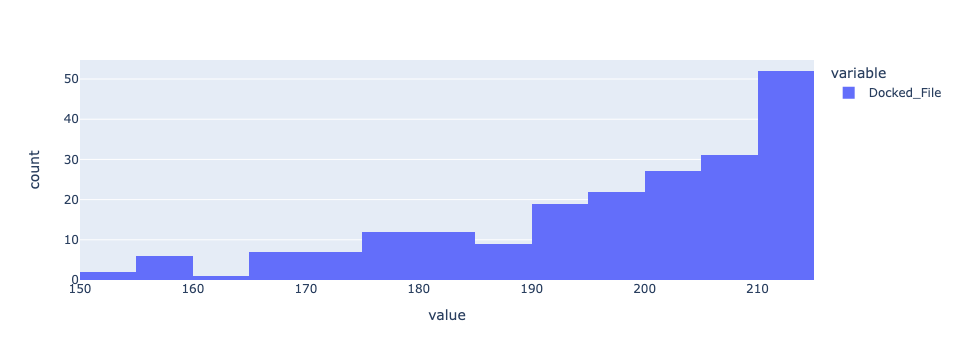

In [161]:
px.histogram(n_successfully_docked / 2)

In [162]:
n_successfully_docked[n_successfully_docked < 308]

Compound_ID
ALP-POS-ecbed2ba-12    307
MAT-POS-5cd9ea36-2     306
Name: Docked_File, dtype: int64

In [163]:
clean[clean.Compound_ID == "ALP-POS-ecbed2ba-12"].groupby("Version").nunique()

,Docked_File,RMSD,POSIT,POSIT_Method,Chemgauss4,Clash,POSIT_R,Complex_ID,Compound_ID,Structure_Source,...,GAT_Score,Structure_Path,Compound_Source,Structure_Name,Data_Collection_Date,Structure_Date,SCHNET_score,Reference_Ligand,TanimotoCombo,SASA (nm^2)
Version,,,,,,,,,,,,,,,,,,,,,
All,212,212,14,3,203,2,14,212,1,212,...,0,212,1,212,210,32,0,212,212,210
Hybrid-Only,95,95,9,1,95,2,9,95,1,95,...,0,95,1,95,95,25,0,95,95,93


In [164]:
minimal_success = clean[(clean.Compound_ID == "ALP-POS-ecbed2ba-12") & (clean.Version == "Hybrid-Only")].Reference_Ligand.unique()

In [165]:
superclean = clean[clean.Compound_ID.isin(minimal_success)]
superclean = superclean[superclean.Reference_Ligand.isin(minimal_success)]

In [166]:
n_successfully_docked_superclean = superclean.groupby("Compound_ID").nunique().Docked_File

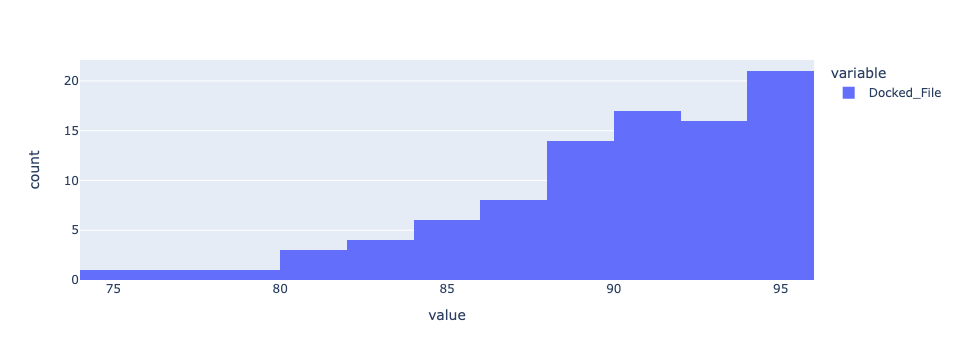

In [167]:
px.histogram(n_successfully_docked_superclean / 2)

In [168]:
minimal_success = superclean[(superclean.Compound_ID == "MAT-POS-5cd9ea36-16") & (superclean.Version == "Hybrid-Only")].Reference_Ligand.unique()

In [169]:
superclean = superclean[superclean.Compound_ID.isin(minimal_success)]
superclean = superclean[superclean.Reference_Ligand.isin(minimal_success)]

In [170]:
n_successfully_docked_superclean = superclean.groupby("Compound_ID").nunique().Docked_File

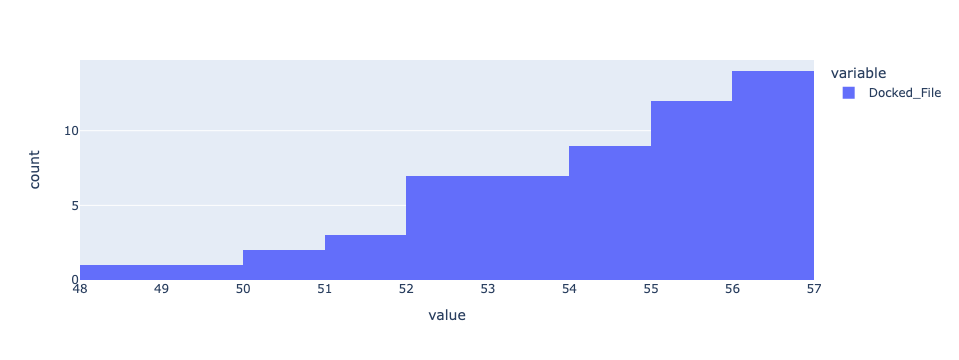

In [171]:
px.histogram(n_successfully_docked_superclean / 2)

In [172]:
superclean.groupby("Compound_ID").nunique().sort_values("Docked_File")

,Docked_File,RMSD,POSIT,POSIT_Method,Chemgauss4,Clash,POSIT_R,Complex_ID,Version,Structure_Source,...,GAT_Score,Structure_Path,Compound_Source,Structure_Name,Data_Collection_Date,Structure_Date,SCHNET_score,Reference_Ligand,TanimotoCombo,SASA (nm^2)
Compound_ID,,,,,,,,,,,,,,,,,,,,,
MAT-POS-5cd9ea36-13,96,86,12,3,83,2,12,56,2,56,...,0,56,1,56,56,18,0,56,56,54
EDG-MED-ba1ac7b9-21,99,78,8,3,77,2,8,56,2,56,...,0,56,1,56,56,19,0,56,56,54
MAT-POS-6c284e65-1,100,74,9,3,74,1,9,56,2,56,...,0,56,1,56,56,19,0,56,56,54
VLA-UCB-50c39ae8-7,100,89,12,3,89,2,12,56,2,56,...,0,56,1,56,56,19,0,56,56,54
MAT-POS-5cd9ea36-21,102,87,12,3,87,2,12,56,2,56,...,0,56,1,56,56,19,0,56,56,54
EDJ-MED-7889e8da-5,102,78,9,3,74,2,9,56,2,56,...,0,56,1,56,56,19,0,56,56,54
EDG-MED-70ae9412-2,102,86,8,3,86,1,8,56,2,56,...,0,56,1,56,56,19,0,56,56,54
MAT-POS-90fd5f68-31,104,89,9,3,87,2,9,56,2,56,...,0,56,1,56,56,19,0,56,56,54
ALP-POS-9c80c481-1,104,93,11,3,93,2,11,56,2,56,...,0,56,1,56,56,19,0,56,56,54


In [173]:
minimal_success = superclean[(superclean.Compound_ID == "MAT-POS-5cd9ea36-13") & (superclean.Version == "Hybrid-Only")].Reference_Ligand.unique()

In [174]:
superclean = superclean[superclean.Compound_ID.isin(minimal_success)]
superclean = superclean[superclean.Reference_Ligand.isin(minimal_success)]

In [175]:
n_successfully_docked_superclean = superclean.groupby("Compound_ID").nunique().Docked_File

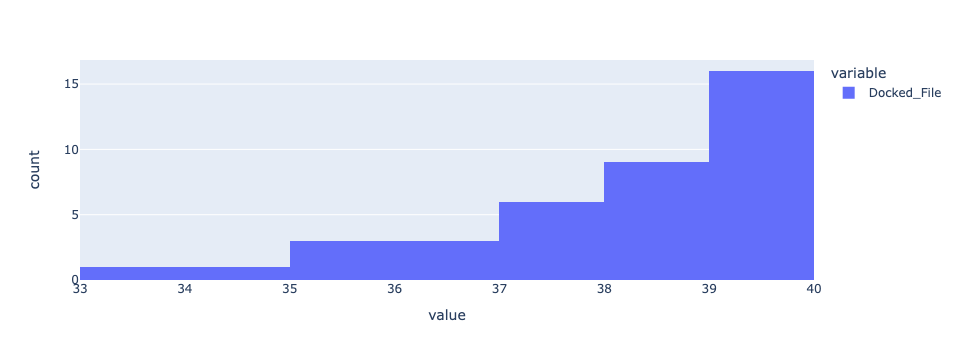

In [176]:
px.histogram(n_successfully_docked_superclean / 2)

In [177]:
#clean = clean[clean.Complex_ID.isin(complexes)]

In [178]:
#clean.groupby("Version").nunique()[["Complex_ID", "Compound_ID", "Structure_Source"]]

In [179]:
clean_all = clean[clean.Version == "All"]

In [180]:
clean_all.groupby("Version").nunique()[["Complex_ID", "Compound_ID", "Structure_Source"]]

,Complex_ID,Compound_ID,Structure_Source
Version,,,
All,43884,207,213


## Variables

In [181]:
tc = "TanimotoCombo"
tc_title = "TanimotoCombo Cutoff for Inclusion of Reference Structures"
tcr = "TanimotoCombo_R"
y="Fraction"
posit_r = "POSIT_R"
posit_method="POSIT_Method"
color="Version"
id_col="Compound_ID"
rmsd="RMSD"
method_split=[posit_method]
n=1
good=2
tc_cutoffs = np.linspace(0,2,50)
tcr_cutoffs = np.linspace(2,0,50)
sort_cols = [rmsd, posit_r, "Chemgauss4", tcr]
dates = df.Structure_Date.unique()
date_col = "Structure_Date"
date_title = "Date for Inclusion of Reference Structures"
reference_col = "Structure_Source"
split_cols=["Version"]
sort_col_name="Sorted_By"
full_split_cols=["Version", posit_method]
split_column_sets={"General":split_cols, "Detailed":full_split_cols}
general_split_cols = {"General":split_cols}
detailed_split_cols = {"Detailed":full_split_cols}
frac_title=f"Fraction of Poses < {good}Å from Reference"

## Calculation Functions

## Plotting Functions

### plot kwargs

In [182]:
df.Version.unique()

array(['Hybrid-Only', 'All', nan], dtype=object)

In [183]:
df.POSIT_Method.unique()

array(['HYBRID', 'SHAPEFIT', 'FRED', nan], dtype=object)

In [184]:
# this doesn't actually work
full_versions = [("All", method) for method in df.POSIT_Method.unique()] + [("Hybrid-Only", "HYBRID")]
full_version_labels = [f"{version}: {method}" for version, method in full_versions]
full_version_label_dict = {og: label for og, label in zip(full_versions, full_version_labels)}

In [185]:
basic_plot_kwargs = dict(color=color, 
                         )

In [186]:
big_plot_kwargs = dict(facet_col=sort_col_name,
                         facet_row="Split", 
                         height=600, 
                         width=1200, )

In [187]:
single_plot_kwargs = dict(height=400, width=600)

In [188]:
tc_plot_kwargs = dict(x=tc,  
                      labels={tc: tc_title},
                     range_x=[-0.1,2.1],)

In [189]:
date_plot_kwargs = dict(x=date_col,
                        labels={date_col:date_title},
                       )

In [190]:
fraction_plot_kwargs = dict(range_y=[-0.1,1.1])

In [191]:
stats_kwargs = dict(y="Value", error_y="STD")

In [192]:
def combine_labels_kwargs(list_of_kwargs):
    new_dict = {}
    for kwargs in list_of_kwargs:
        for k,v in kwargs.items():
            if k in new_dict.keys():
                if isinstance(v, dict):
                    for ik, iv in v.items():
                        new_dict[k][ik] = iv
                else:
                    raise NotImplementedError(f"combining these kwargs will not work due to repeated use of {k}")
            else:
                new_dict[k] = v
    return new_dict
    

In [193]:
combine_labels_kwargs([big_plot_kwargs, tc_plot_kwargs])

{'facet_col': 'Sorted_By',
 'facet_row': 'Split',
 'height': 600,
 'width': 1200,
 'x': 'TanimotoCombo',
 'labels': {'TanimotoCombo': 'TanimotoCombo Cutoff for Inclusion of Reference Structures'},
 'range_x': [-0.1, 2.1]}

In [194]:
general_posit_kwargs = {sort_col_name: posit_r, "Split":"General"}

### cleanup functions

In [195]:
def replace_xaxis_labels(fig: Figure, axis_title):
    fig.for_each_xaxis(lambda x: x.update(title = ''))
    fig.add_annotation(x=0.5,y=-0.15,
                   text=axis_title, textangle=0,
                       font=dict(size=16),
                    xref="paper", yref="paper",
            showarrow=False,)
    return fig

In [196]:
def replace_yaxis_labels(fig: Figure, axis_title):
    fig.for_each_yaxis(lambda y: y.update(title = ''))
    fig.add_annotation(x=-0.05,y=0.5,
                   text=axis_title, textangle=-90,
                       font=dict(size=16),
                    xref="paper", yref="paper",
            showarrow=False,)
    return fig

In [197]:
def clean_labels(fig):
    fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
    return fig

### scatterplot wrapper

In [198]:
def scatter_wrapper(df, kwarg_dict, 
                    x_axis_title=None, 
                    y_axis_title=None, 
                    replace_xaxis=False,
                    replace_y_axis=False,
                    clean=True,
                    x_axis_reversed=False
                   ):
    fig:Figure = px.scatter(df, **kwarg_dict, hover_data=df.columns)
    if x_axis_title:
        if replace_xaxis:
            fig = replace_xaxis_labels(fig, x_axis_title)
        else:
            fig.update_xaxes(title=x_axis_title)
    
    if y_axis_title:
        if replace_y_axis:
            fig = replace_yaxis_labels(fig, y_axis_title)
        else:
            fig.update_yaxes(title=y_axis_title)
    
    if clean:
        fig = clean_labels(fig)
    if x_axis_reversed:
        fig.update_xaxes(autorange="reversed")
    return fig

### splify df

In [199]:
def simplify_df(df, condition_dict):
    new_df = df.copy()
    for column, value in condition_dict.items():
        new_df = new_df[new_df[column] == value]
    return new_df

# Add new analysis

In [218]:
reload(a)
random_stats = a.calculate_rmsd_stats(clean, query_mol_id="Compound_ID", reference_selection="random", ref_structure_stride=10, score_column="POSIT_R", group_by=["Version"], n_bootstraps=100)

In [219]:
sasa_stats = a.calculate_rmsd_stats(clean, query_mol_id="Compound_ID", reference_selection="SASA (nm^2)", ref_structure_stride=10, score_column="POSIT_R", group_by=["Version"], n_bootstraps=100)

In [220]:
clean["SASA_R"] = 0 - clean["SASA (nm^2)"]

In [221]:
sasa_r_stats = a.calculate_rmsd_stats(clean, query_mol_id="Compound_ID", reference_selection="SASA_R", ref_structure_stride=10, score_column="POSIT_R", group_by=["Version"], n_bootstraps=100)

In [222]:
all_stats = pd.concat([random_stats, sasa_stats, sasa_r_stats])

In [223]:
aggregated = all_stats.groupby(["Version", "Number of References", "Structure_Split", "Split_Value_min", "Split_Value_max"]).mean().reset_index()
aggregated["Max"] = all_stats.groupby(["Version", "Number of References", "Structure_Split"]).quantile(0.975).reset_index()["Fraction"] - aggregated["Fraction"]
aggregated["Min"] = aggregated["Fraction"] - all_stats.groupby(["Version", "Number of References", "Structure_Split"]).quantile(0.025).reset_index()["Fraction"]

/var/folders/cf/d42qwdmd5_g5s63r3g_vgx2c0000gn/T/ipykernel_28191/919425509.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/var/folders/cf/d42qwdmd5_g5s63r3g_vgx2c0000gn/T/ipykernel_28191/919425509.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.quantile is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/var/folders/cf/d42qwdmd5_g5s63r3g_vgx2c0000gn/T/ipykernel_28191/919425509.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.quantile is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [224]:
aggregated

,Version,Number of References,Structure_Split,Split_Value_min,Split_Value_max,Fraction,Max,Min
0,All,1,SASA (nm^2),29.205152,29.248864,0.111111,0.000000,0.000000
1,All,1,SASA_R,-30.669591,-30.466556,0.362319,0.000000,0.000000
2,All,1,random,Random,Random,0.435556,0.054903,0.063816
3,All,11,SASA (nm^2),29.205152,29.403708,0.709710,0.019758,0.023720
4,All,11,SASA_R,-30.669591,-30.07588,0.667923,0.022899,0.018285
...,...,...,...,...,...,...,...,...
127,Hybrid-Only,201,SASA_R,-30.669591,-29.205152,0.913623,0.009082,0.010242
128,Hybrid-Only,201,random,Random,Random,0.911498,0.011208,0.012947
129,Hybrid-Only,211,SASA (nm^2),29.205152,30.669591,0.913188,0.009517,0.009807
130,Hybrid-Only,211,SASA_R,-30.669591,-29.205152,0.914251,0.008454,0.006039


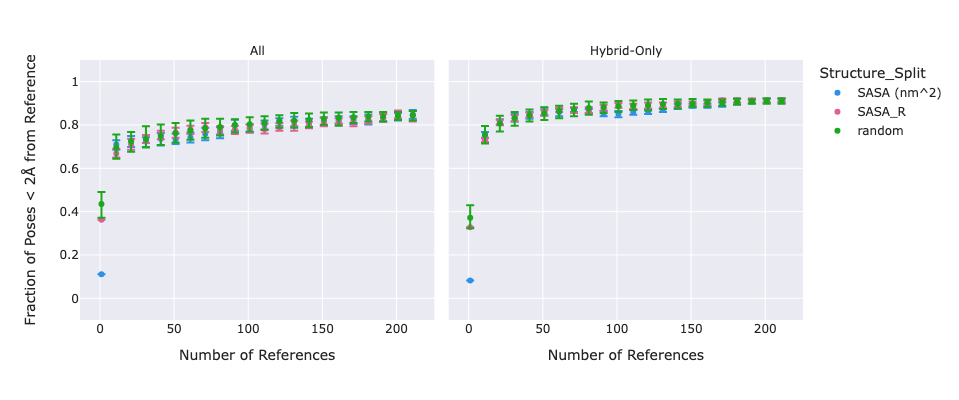

In [226]:
fig = scatter_wrapper(aggregated, 
                      dict(
                          y="Fraction", color="Structure_Split", facet_col="Version",
                          color_discrete_sequence=px.colors.qualitative.Dark24,
                          error_y="Max", 
                          error_y_minus="Min",
                          template="seaborn",
                           **fraction_plot_kwargs,
                           x="Number of References", 
                          height=600,
                          width=800
                           # **single_plot_kwargs
                      ),
                     y_axis_title=frac_title,
                     x_axis_title="Number of References"
                     )
fig.for_each_yaxis(lambda y: y.update(title = ''))
fig.update_layout(yaxis1=dict(title=frac_title), height=400, width=800)
fig.show()
fig.write_image("20231101_sasa_comparison.png")